The function that chooses gene name or gene length (for now)

In [1]:
import pandas as pd
from collections import defaultdict 

def gtf_file_manipulation(file_name, output_file_name = 'optional', gene_name = 'optional', intron_length_required= 'optional',  gene_length = 'optional' ,first_exon_length_min = 'optional', first_exon_length_max = 'optional'):


    if gene_name != 'optional':
        data = pd.read_csv(file_name, sep = '\t') 
        number_of_exons = len(data[data['gene_name']== gene_name])
        print('the number of the exons that ', gene_name, 'has is',  number_of_exons)
        gene_exons_data = data[data['gene_name']== gene_name]
        gene_len = list(gene_exons_data['gene_length'])
        print('the gene length is a set that must have one element and it is equal to', gene_len)
        gene_exons_length_dict = defaultdict(int)
        for i in gene_exons_data.index:
            gene_exons_length_dict[int((gene_exons_data['exon_id'][i])[gene_exons_data['exon_id'][i].index('e')+1:])] = gene_exons_data['exon_start'][i],  (gene_exons_data['exon_end'][i]- gene_exons_data['exon_start'][i])
        gene_exons_length_dict_sorted_by_exons_sort =  dict(sorted(gene_exons_length_dict.items()))

        to_print = []
        for i in list(gene_exons_length_dict_sorted_by_exons_sort.values()):
            if i[0]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0] >= 0 :
                to_print.append((i[0]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0], i[1]))

        #intron_length = []    
        #for i,j in list(zip(list(gene_exons_length_dict_sorted_by_exons_sort.values())[:-1],list(gene_exons_length_dict_sorted_by_exons_sort.values())[1:])):
        #    intron_length.append(j[0] - (i[0]+i[1]))

        #intron_length.append('end')
                #print(len(gene_exons_length_dict_sorted_by_exons_sort.values()))
                #print(len(intron_length))
        #exon_length_intron_length = list(zip(list(gene_exons_length_dict_sorted_by_exons_sort.values()), intron_length))
           # to_write = (str(gene_name) + str(' ') + str((gene_len)) + str(' ') + str(exon_length_intron_length))
           # out.write(to_write+'\n')
        return(gene_name, str(gene_len[0]), str(to_print).replace('(','').replace(')','').replace('[','').replace(']',''))
    
    '''
    if gene_length != 'optional':
        data = pd.read_csv(file_name, sep = '\t')
        gene_lengths = []
        for length in list(data['gene_length']):
            if ',' not in length:
                gene_lengths.append(int(length))
            if ',' in length:
                gene_lengths.append(int(length[:length.index(',')]))
        data['gene_length'] = gene_lengths
        above_threshold = (data[data['gene_length']  >= gene_length]) 
        dataframes_of_different_genes = [y for x, y in above_threshold.groupby('gene_name')]
        with open(output_file_name, 'w') as out:
            for gene_id in range(len(dataframes_of_different_genes)):
                gene_exons_length_dict = defaultdict(int)
                number_of_exons = len(dataframes_of_different_genes[gene_id])
                Name_of_the_gene = dataframes_of_different_genes[gene_id]['gene_name'].values[0]
                length_of_the_gene = dataframes_of_different_genes[gene_id]['gene_length'].values[0]
                for i in dataframes_of_different_genes[gene_id].index:
                    gene_exons_length_dict[int((dataframes_of_different_genes[gene_id]['exon_id'][i])[dataframes_of_different_genes[gene_id]['exon_id'][i].index('e')+1:])] =  dataframes_of_different_genes[gene_id]['exon_start'][i] , (dataframes_of_different_genes[gene_id]['exon_end'][i] -  dataframes_of_different_genes[gene_id]['exon_start'][i])
                gene_exons_length_dict_sorted_by_exons_sort =  dict(sorted(gene_exons_length_dict.items()))
                to_print = []
                for i in list(gene_exons_length_dict_sorted_by_exons_sort.values()):
                    if i[0]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0] >= 0 :
                        to_print.append((i[0]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0], i[1]))
                to_write = (str(Name_of_the_gene) + ('\t') + str(length_of_the_gene) + ('\t')  + str(to_print).replace('(', '').replace(')', '').replace('[', '').replace(']', ''))
                out.write(to_write+'\n')
        return('Done!')'''
                
           
    if (first_exon_length_min != 'optional'and first_exon_length_max != 'optional' and gene_length != 'optional'):
        data = pd.read_csv(file_name, sep = '\t')
        dataframes_of_different_genes = [y for x, y in data.groupby('gene_name')]
       
        with open(output_file_name, 'w') as out:
            
            for gene_id in range(len(dataframes_of_different_genes)):
                gene_exons_length_dict = defaultdict(int)
                number_of_exons = len(dataframes_of_different_genes[gene_id])
                Name_of_the_gene = dataframes_of_different_genes[gene_id]['gene_name'].values[0]
                length_of_the_gene = dataframes_of_different_genes[gene_id]['gene_length'].values[0]
                if ',' in length_of_the_gene:
                    length_of_the_gene = length_of_the_gene[:length_of_the_gene.index(',')]
 
                for i in dataframes_of_different_genes[gene_id].index:
                    gene_exons_length_dict[int((dataframes_of_different_genes[gene_id]['exon_id'][i])[dataframes_of_different_genes[gene_id]['exon_id'][i].index('e')+1:])] =  (dataframes_of_different_genes[gene_id]['exon_start'][i] , dataframes_of_different_genes[gene_id]['exon_end'][i]) # -  dataframes_of_different_genes[gene_id]['exon_start'][i])
                gene_exons_length_dict_sorted_by_exons_sort =  dict(sorted(gene_exons_length_dict.items()))
                print(gene_exons_length_dict_sorted_by_exons_sort)
                
                
                if ((list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][1]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0]) > first_exon_length_min) and ((list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][1]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0]) < first_exon_length_max) and (int(length_of_the_gene) < gene_length) :
                    intron_length = []    
                    for i,j in list(zip(list(gene_exons_length_dict_sorted_by_exons_sort.values())[:-1],list(gene_exons_length_dict_sorted_by_exons_sort.values())[1:])):
                        intron_length.append(j[0] - (i[0]+i[1]))
                    intron_length.append('end')
                    exon_length_intron_length = list(zip(list(gene_exons_length_dict_sorted_by_exons_sort.values()), intron_length))
                    
                    to_print = []
                    for i in list(gene_exons_length_dict_sorted_by_exons_sort.values()):
                        if i[0]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0] >= 0 :
                            to_print.append((i[0]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0], i[1]-list(gene_exons_length_dict_sorted_by_exons_sort.values())[0][0]))
                        
                            
                    
                    to_write = (str(Name_of_the_gene) + (',') + str(length_of_the_gene) + (',')  + str(to_print).replace('(', '').replace(')', '').replace('[', '').replace(']', ''))
                    out.write(to_write+'\n')
                else:
                    continue
        return('Done!')


    if (gene_length != 'optional' and intron_length_required != 'optional'):
        data = pd.read_csv(file_name, sep = '\t')
        dataframes_of_different_genes = [y for x, y in data.groupby('gene_name')]
        lista_for_sim = []
        with open(output_file_name, 'w') as out:
            
            for gene_id in range(len(dataframes_of_different_genes)):
                gene_exons_length_dict = defaultdict(int)
                number_of_exons = len(dataframes_of_different_genes[gene_id])
                Name_of_the_gene = dataframes_of_different_genes[gene_id]['gene_name'].values[0]
                length_of_the_gene = dataframes_of_different_genes[gene_id]['gene_length'].values[0]
                if ',' in length_of_the_gene:
                    length_of_the_gene = length_of_the_gene[:length_of_the_gene.index(',')]
 
                for i in dataframes_of_different_genes[gene_id].index:
                    gene_exons_length_dict[int((dataframes_of_different_genes[gene_id]['exon_id'][i])[dataframes_of_different_genes[gene_id]['exon_id'][i].index('e')+1:])] =  (dataframes_of_different_genes[gene_id]['exon_start'][i] , dataframes_of_different_genes[gene_id]['exon_end'][i]) # -  dataframes_of_different_genes[gene_id]['exon_start'][i])
                gene_exons_length_dict_sorted_by_exons =  dict(sorted(gene_exons_length_dict.items()))
               # print(gene_exons_length_dict_sorted_by_exons)
                
                
                if (int(length_of_the_gene) >= gene_length) :
                    intron_length = []    
                    for i,j in list(zip(list(gene_exons_length_dict_sorted_by_exons.values())[:-1],list(gene_exons_length_dict_sorted_by_exons.values())[1:])):
                        intron_length.append(j[0] - (i[1]))
                    intron_length.append('end')
                    exon_length_intron_length = list(zip(list(gene_exons_length_dict_sorted_by_exons.values()), intron_length))
                    if intron_length[0] > intron_length_required:
                        to_print = []
                        for i in list(gene_exons_length_dict_sorted_by_exons.values()):
                            if i[0]-list(gene_exons_length_dict_sorted_by_exons.values())[0][0] >= 0 :
                                to_print.append((i[0]-list(gene_exons_length_dict_sorted_by_exons.values())[0][0], i[1]-list(gene_exons_length_dict_sorted_by_exons.values())[0][0]))
                        
                            
                    
                        to_write = (str(Name_of_the_gene) + (',') + str(length_of_the_gene) + (',')  + str(to_print).replace('(', '').replace(')', '').replace('[', '').replace(']', ''))
                        lista_for_sim.append(to_write)
                        out.write(to_write+'\n')
                    else:
                        continue
                else:
                    continue
        return('Done!')






The next is to produce files with specific genes above a gene length

In [4]:
gtf_file_manipulation('refseq.exons.txt', 'output_file_of_genes_60k_intron_10k', gene_length=60_000, intron_length_required=10_000)

'Done!'

In [3]:
gtf_file_manipulation('refseq.exons.txt', 'output_file_of_genes_greater_50k.csv', gene_length=50_000)

In [ ]:
gtf_file_manipulation('refseq.exons.txt', 'output_file_of_genes_with_first_exon_greater_than3000_less_than_4000', first_exon_length_min=3_000, first_exon_length_max= 4_000, gene_length = 50_000)

The next one is to choose genes bases on their name that can be given in a list

In [ ]:
lista = ['A2M', 'NAT2', 'AJUBA', 'SETDB1', 'SATB1']
with open('genempla.csv', 'w') as mpla:
    for i in lista:
        mpla.write(str(gtf_file_manipulation('refseq.exons.txt', gene_name = i)).strip('(').strip(')')+'\n')

In [ ]:
vln_plot = pd.read_csv('output_file_of_genes_60k_intron_10k', names=list(range(500)))

In [83]:
import math
import numpy as np
np.log(vln_plot[3])
df = pd.DataFrame([np.log(vln_plot[3]), np.log(vln_plot[4]-vln_plot[3]),  np.log(vln_plot[5]-vln_plot[4]),   np.log(vln_plot[6]-vln_plot[5]), np.log(vln_plot[7]-vln_plot[6]), np.log(vln_plot[8]-vln_plot[7])])
df2 = (df.T).set_axis(['exon1', 'intron1', 'exon2', 'intron2', 'exon3',  'intron3'], axis=1)
df2


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,exon1,intron1,exon2,intron2,exon3,intron3
0,4.828314,11.018416,4.709530,9.229260,4.584967,7.605392
1,4.532599,9.971427,4.543295,8.553332,4.820282,9.951944
2,5.407172,10.968474,5.176150,7.486053,4.836282,8.431417
3,6.013715,9.890504,4.382027,10.718565,4.990433,7.487734
4,7.976595,9.882468,4.836282,8.646993,4.442651,8.784468
...,...,...,...,...,...,...
1772,7.326466,10.540461,4.564348,10.373179,4.663439,8.786151
1773,4.532599,11.150434,4.836282,10.920402,4.317488,6.591674
1774,5.273000,10.730269,5.181784,10.455071,4.343805,9.455245
1775,6.516193,11.847482,5.877736,9.784028,5.003946,8.109225


In [84]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
pip install seaborn

{'exon1': 'o', 'intron1': 'o', 'exon2': 'o', 'intron2': 'o', 'exon3': 'o', 'intron3': 'o'}


[Text(0, 0.5, 'log2 of the length in base pairs'),
 Text(0.5, 1.0, 'Log2 of lengths of exons and introns of genes with length over 60kb pairs')]

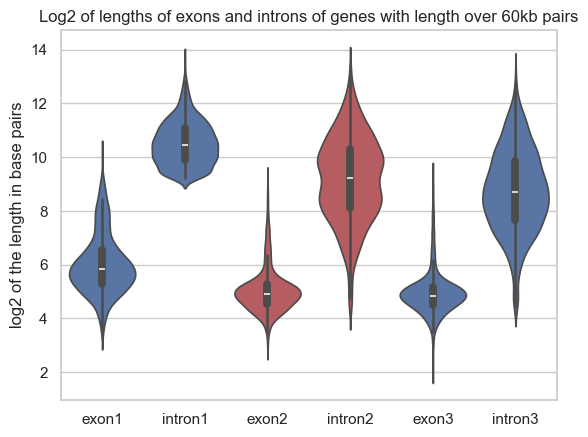

In [106]:
#ax.set(ylim=(10, 200_000))
my_pal = {species: "r" if (species == "exon2" or species =='intron2') else "b"     for species in df2}
my_pal2 = {species: "o"   for species in df2[:3]}
new = {**my_pal2, **my_pal}
print(my_pal2)
ax = sns.violinplot( data= df2, palette=my_pal)
ax.set(ylabel="log2 of the length in base pairs", title= "Log2 of lengths of exons and introns of genes with length over 60kb pairs")



In [ ]:


import seaborn 
    
    
seaborn.set(style = 'whitegrid')  
tip = seaborn.load_dataset('tips')
  
seaborn.violinplot(x ='day', y ='tip', data = vln_plot)

In [42]:
import pandas as pd
from collections import defaultdict 

def gtf_file_manipulation(file_name, output_file_name = 'optional', gene_name = 'optional', intron_length_required= 'optional',  gene_length = 'optional' ,first_exon_length_min = 'optional', first_exon_length_max = 'optional'):

    
    if gene_length != 'optional':
        data = pd.read_csv(file_name, sep = '\t')
        gene_lengths = []
        for length in list(data['gene_length']):
            if ',' not in length:
                gene_lengths.append(int(length))
            if ',' in length:
                gene_lengths.append(int(length[:length.index(',')]))
        data['gene_length'] = gene_lengths
        above_threshold = (data[data['gene_length']  >= gene_length]) 
        dataframes_of_different_genes = [y for x, y in above_threshold.groupby('gene_id')]
        c = 0 
        with open(output_file_name, 'w') as out:
            for gene_id in range(len(dataframes_of_different_genes)):
                gene_exons_length_dict = defaultdict(int)
                Name_of_the_gene = dataframes_of_different_genes[gene_id]['gene_id'].values[0]
                chromosome = dataframes_of_different_genes[gene_id]['chromosome'].values[0]
                gene_start = dataframes_of_different_genes[gene_id]['gene_start'].values[0]
                gene_end = dataframes_of_different_genes[gene_id]['gene_end'].values[0]
                number_of_exons = len(dataframes_of_different_genes[gene_id])
                length_of_the_gene = dataframes_of_different_genes[gene_id]['gene_length'].values[0]
                exons_rank = []
                for i in dataframes_of_different_genes[gene_id].index:
                    exons_rank.append(int((dataframes_of_different_genes[gene_id]['exon_id'][i])))
                    gene_exons_length_dict[int((dataframes_of_different_genes[gene_id]['exon_id'][i]))] =  dataframes_of_different_genes[gene_id]['exon_start'][i] , dataframes_of_different_genes[gene_id]['exon_end'][i] 
                gene_exons_length_dict_sorted_by_exons_sort =  dict(sorted(gene_exons_length_dict.items()))
                #print(gene_exons_length_dict_sorted_by_exons_sort)
                if (len(sorted(exons_rank)) != len(set(exons_rank))):
                    c+=1
                #print(sorted(exons_rank))
                if (int(length_of_the_gene) >= gene_length) :
                    intron_length = []    
                    for i,j in list(zip(list(gene_exons_length_dict_sorted_by_exons_sort.values())[:-1],list(gene_exons_length_dict_sorted_by_exons_sort.values())[1:])):
                        intron_length.append(j[0] - (i[1]))
                    intron_length.append('end')
                    exon_length_intron_length = list(zip(list(gene_exons_length_dict_sorted_by_exons_sort.values()), intron_length))
                    if intron_length[0] > intron_length_required:
                        #print(gene_exons_length_dict_sorted_by_exons_sort.values())
                        to_write = (str(Name_of_the_gene) + ('\t') + str(chromosome) + ('\t')  + str(gene_start)  + ('\t')  +  str(gene_end)  + ('\t')  +  str(length_of_the_gene)  + ('\t') + str(list(gene_exons_length_dict_sorted_by_exons_sort.values())[:-1])  )
                        out.write(to_write+'\n')
        print(c, len(dataframes_of_different_genes))
        return('Done!')
                
           
 

In [45]:
gtf_file_manipulation('final.txt', 'output_file_of_genes_greater_5Kbp_first_intron.tsv', gene_length=30000, intron_length_required= 5000 )

0 8676


'Done!'

In [41]:
##### Prediction in  Genes with Above a Gene Length Threshold and above a First Intron Length threshold ####
import numpy as np
def genes_above_threshold(file_with_genes, gene_of_interest_positions, intron_exons_junctions):
    with open(gene_of_interest_positions, 'w+') as interest_positions:
        with open(intron_exons_junctions, 'w+') as intron_exon_junctions:
            with open(file_with_genes, 'r+') as genes:
                gene_list = genes.readlines()
                for gene in gene_list:
                    name = gene.strip('\n').split('\t')[0]
                    chr =  gene.strip('\n').split('\t')[1]
                    start = gene.strip('\n').split('\t')[2]
                    end = gene.strip('\n').split('\t')[3]
                    length =gene.strip('\n').split('\t')[4]
                    list_with_exons = eval(gene.strip('\n').split('\t')[5])
                    starts =  list(np.arange(int(start), int(end), 20))
                    ends =   list(np.arange((int(start)+1), (int(end)+1),20))
                    number_of_exons = len(list_with_exons)
                    list_with_introns =  [(list_with_exons[i][1], list_with_exons[i + 1][0]) for i in range(len(list_with_exons) - 1)]
                    exon_rank = 0
                    intron_rank = 0
                    #print(list_with_exons)
                    #print(list_with_introns)
                    # report if exon as 1 and if it is intron as a 0
                    for exon in list_with_exons:
                        exon_rank += 1
                        # generate random positions in all exons and report their rank and that they are exons (1)
                        random_numbers_list = np.random.randint(exon[0], exon[1], size=(int((exon[1]-exon[0])/20)))
                        for i in random_numbers_list:
                            interest_positions.write(str(chr)+'\t'+str(i)+'\t'+str(i+1)+'\t'+str(exon_rank)+'\t'+str(1)+'\n')
                    for intron in list_with_introns:
                        intron_rank += 1
                        random_numbers_list = np.random.randint(intron[0], intron[1], size=(int((intron[1]-intron[0])/20)))
                        intron_exon_junctions.write(str(chr)+'\t'+str(intron[1])+'\t'+str(intron[1]+1)+'\t'+str(intron_rank)+'\t'+str(1)+'\n')
                        intron_exon_junctions.write(str(chr)+'\t'+str(intron[0])+'\t'+str(intron[0]-1)+'\t'+str(intron_rank)+'\t'+str(1)+'\n')
                        for i in random_numbers_list:
                            interest_positions.write(str(chr)+'\t'+str(i)+'\t'+str(i+1)+'\t'+str(intron_rank)+'\t'+str(0)+'\n')
                    
                    #for i in range(int(int(length)/20)):
                    #    interest_positions.write(str(chr)+'\t'+str(starts[i])+'\t'+(str(ends[i]))+'\n')


genes_above_threshold('output_file_of_genes_greater_100bp.tsv', 'positions_of_interest.tsv', 'intron_exon_juctions.tsv')##### Prediction in  Genes with Above a Gene Length Threshold and above a First Intron Length threshold ####
